**Nama : Ichwanul Fata**

**NPM : 2108107010035**

**REGRESI MENGGUNAKAN SVR**

1. Import Library

In [1]:
# Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2. Import Data

In [2]:
# Import data from CSV file
dataset = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSsYQKtYLv-r7FFfqneDqIjeBpws2ftD1F8eEXKY-p-tOGdI_vVyn2Q-wnMlbXdYerRX1Uhao555u_g/pub?gid=349111382&single=true&output=csv")

3. Menampilkan 5 data teratas

In [3]:
# Top 5 data
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


4. Melihat informasi dari data

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


5. Menampilkan nilai missing value

In [5]:
# Show the number missing value
dataset.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

6. Mengganti missing value dengan mean dari data pada kolom tersebut

In [6]:
# Handling missing value
dataset['bmi'].fillna(dataset['bmi'].mean(), inplace=True)

7. Memilih atribut X (variabel independen) dan Y (variabel dependen)

In [7]:
# Select Attribute X and Y
X = dataset.iloc[:, 8:9].values
Y = dataset.iloc[:, 9:10].values

8. Feature Scaling

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)
print(X)
print(Y)

[[ 2.70637544]
 [ 2.12155854]
 [-0.0050283 ]
 ...
 [-0.51144264]
 [ 1.32825706]
 [-0.46086746]]
[[ 1.00123401e+00]
 [ 4.61555355e-16]
 [ 4.68577254e-01]
 ...
 [ 2.21736316e-01]
 [-4.27845098e-01]
 [-3.49895329e-01]]


9. Training Model

In [9]:
# Fitting Regression modelto the dataset
from sklearn.svm import SVR
regressor_linear = SVR(kernel='linear') # add this parametre kernel='rbf'
regressor_non_linear = SVR(kernel='rbf') # add this parametre kernel='rbf'
regressor_linear.fit(X,Y)
regressor_non_linear.fit(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

10. Testing Model

In [10]:
# Melakukan prediksi langsung pada nilai fitur yang diberikan
y_pred_linear = regressor_linear.predict(X)
y_pred_non_linear = regressor_non_linear.predict(X)

11. Visuaisasi model regresi yang dihasilkan

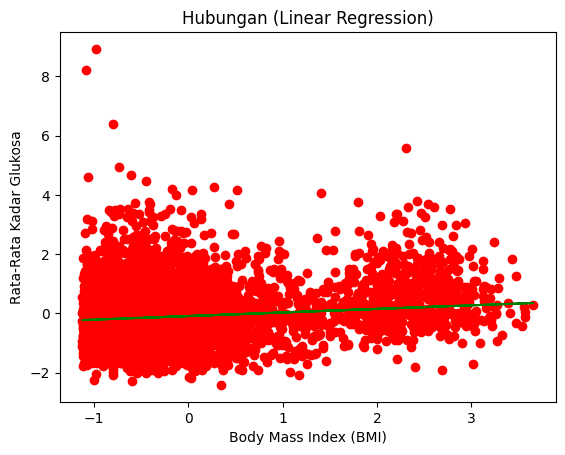

In [11]:
# Visualisation the linear regression result
plt.scatter(x=X, y=Y,color='red')
plt.plot(X, y_pred_linear, color='green')
plt.title('Hubungan (Linear Regression)')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Rata-Rata Kadar Glukosa')
plt.show()

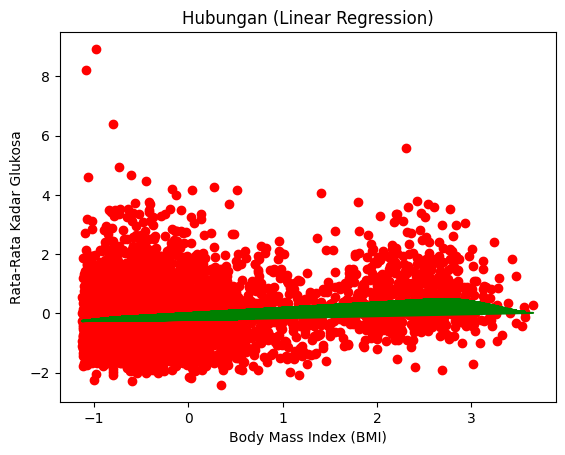

In [12]:
# Visualisation the non linear regression result
plt.scatter(x=X, y=Y,color='red')
plt.plot(X, y_pred_non_linear, color='green')
plt.title('Hubungan (Linear Regression)')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Rata-Rata Kadar Glukosa')
plt.show()